# Polymerization protocol

This jupyter notebook was developed to polymerize monomers using m2p software.

There is no need to assign head and tail previously since m2p detects the bond formation. 

If you desire to predict the head and tail assignment, please provide head_tail=True.

Developed by: **Brenda Ferrari**

In [2]:
import sys
sys.path.append('..')

import pandas as pd
from m2pCalc.polymaker import PolyMaker
from rdkit import Chem

pm = PolyMaker(head_tail=True) 

* Read desirable dataset

The necessary information for the polymerization is polymer name and monomer smiles so, please, prepare the data accordingly

In [4]:
df = pd.read_csv("../datasets_tests/polymerization.csv", sep=",", index_col='name')

In [5]:
df

,experimental procedure,reaction smiles,smiles
name,,,
p-hydroxystyrene,"{'Separately, a polyethylene film having a thi...",C([O:4][C:5]1[CH:12]=[CH:11][C:8]([CH:9]=[CH2:...,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1
hexamethylene sebacate,{'Crystalline poly (hexamethylene sebacate) wa...,[C:1]([OH:14])(=[O:13])[CH2:2][CH2:3][CH2:4][C...,[C]1(=[O])[O][CH2][CH2][CH2][CH2][CH2][CH2][O]...
styrene,{'A copolymer of styrene and isoprene was prep...,[CH2:1]=[CH:2][C:3]1[CH:8]=[CH:7][CH:6]=[CH:5]...,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...
butyl acrylate styrene,{'A 500 ml. glass polymerization vessel equipp...,[Na].C(OC=C)(=O)C.P([O-])([O-])(O)=O.[C:13]([O...,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...
styrene-isoprene-styrene,"{'Into a reaction vessel with a stirrer, 50 kg...",C1CCCCC1.[CH2:7]=[CH:8][C:9]1[CH:14]=[CH:13][C...,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...
p-hydroxystyrene p-methylstyrene,{'A solution of poly(p-tert-butoxystyrene/p-me...,[OH:1][C:2]1[CH:9]=[CH:8][C:5]([CH:6]=[CH2:7])...,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1.[C...


* Get only product and remove atom mappings of reaction smiles (Optional)

In [6]:
from m2pCalc.data import Data

data = Data(df)
df = data.clean_smiles(name_column='name', smiles_column='reaction smiles', reaction=True)
df 

,smiles
name,
p-hydroxystyrene,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1
hexamethylene sebacate,[C]1(=[O])[O][CH2][CH2][CH2][CH2][CH2][CH2][O]...
styrene,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...
butyl acrylate styrene,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...
styrene-isoprene-styrene,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...
p-hydroxystyrene p-methylstyrene,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1.[C...


* Polymerize

In [7]:
# get monomers from smiiles strings
df['monomers'] = df.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
df = pm.thermoplastic(df,DP=2,mechanism="all",replicate_structures=5, head_tail=True)

# output
df

100%|██████████| 30/30 [00:01<00:00, 19.39it/s]


,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism
0,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1.[C...,"('C=Cc1ccc(O)cc1', 'C=Cc1ccc(C)cc1', 'C=COCC')",[],0,ERROR_01:NoReaction,all
1,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],0,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl
2,[C]1(=[O])[O][CH2][CH2][CH2][CH2][CH2][CH2][O]...,"('O=C1CCCCCCCCC(=O)OCCCCCCO1',)",[],0,ERROR_01:NoReaction,all
3,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C', 'C=Cc1ccccc1')",[],0,ERROR_01:NoReaction,all
4,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],0,Oc1ccc(C([Kr])CCC([XeH])c2ccc(O)cc2)cc1,vinyl
5,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],0,C=C(C)C([XeH])CCC([Kr])c1ccccc1,vinyl
6,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],1,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl
7,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],1,C=CC(C)(C[XeH])CC([Kr])c1ccccc1,vinyl
8,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C', 'C=Cc1ccccc1')",[],1,ERROR_01:NoReaction,all
9,[C]1(=[O])[O][CH2][CH2][CH2][CH2][CH2][CH2][O]...,"('O=C1CCCCCCCCC(=O)OCCCCCCO1',)",[],1,ERROR_01:NoReaction,all


* Get only results without errors

In [8]:
from m2pCalc.data import Data

data = Data(df)
df = data.get_results()

In [9]:
df

,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism
1,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],0,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl
4,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],0,Oc1ccc(C([Kr])CCC([XeH])c2ccc(O)cc2)cc1,vinyl
5,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],0,C=C(C)C([XeH])CCC([Kr])c1ccccc1,vinyl
6,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],1,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl
7,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],1,C=CC(C)(C[XeH])CC([Kr])c1ccccc1,vinyl
11,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],1,Oc1ccc(C([Kr])CC(C[XeH])c2ccc(O)cc2)cc1,vinyl
14,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],2,C=C(C)C([XeH])CC(C[Kr])c1ccccc1,vinyl
15,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],2,CCCCOC(=O)C([Kr])CCC([XeH])c1ccccc1,vinyl
16,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],2,Oc1ccc(C([Kr])CC(C[XeH])c2ccc(O)cc2)cc1,vinyl
19,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],3,C=C(C)C(C[XeH])C(C[Kr])c1ccccc1,vinyl


* Remove m2p noble gases assignment from output dataset and add head and tail nomenclature

In [10]:
from m2pCalc.data import Data

data = Data(df)
df_headtail = data.add_head_tail(head_pattern='\[Kr\]', tail_pattern='\[XeH\]')
df_headtail

,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism,smiles_polymer_head_tail
1,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],0,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl,CCCCOC(=O)C([*:1])CC(C[*:2])c1ccccc1
4,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],0,Oc1ccc(C([Kr])CCC([XeH])c2ccc(O)cc2)cc1,vinyl,Oc1ccc(C([*:1])CCC([*:2])c2ccc(O)cc2)cc1
5,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],0,C=C(C)C([XeH])CCC([Kr])c1ccccc1,vinyl,C=C(C)C([*:2])CCC([*:1])c1ccccc1
6,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],1,CCCCOC(=O)C([Kr])CC(C[XeH])c1ccccc1,vinyl,CCCCOC(=O)C([*:1])CC(C[*:2])c1ccccc1
7,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],1,C=CC(C)(C[XeH])CC([Kr])c1ccccc1,vinyl,C=CC(C)(C[*:2])CC([*:1])c1ccccc1
11,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],1,Oc1ccc(C([Kr])CC(C[XeH])c2ccc(O)cc2)cc1,vinyl,Oc1ccc(C([*:1])CC(C[*:2])c2ccc(O)cc2)cc1
14,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],2,C=C(C)C([XeH])CC(C[Kr])c1ccccc1,vinyl,C=C(C)C([*:2])CC(C[*:1])c1ccccc1
15,[C]([O][CH2][CH2][CH2][CH3])(=[O])[CH]=[CH2].[...,"('C=CC(=O)OCCCC', 'C=Cc1ccccc1')",[],2,CCCCOC(=O)C([Kr])CCC([XeH])c1ccccc1,vinyl,CCCCOC(=O)C([*:1])CCC([*:2])c1ccccc1
16,[OH][C]1[CH]=[CH][C]([CH]=[CH2])=[CH][CH]=1,"('C=Cc1ccc(O)cc1',)",[],2,Oc1ccc(C([Kr])CC(C[XeH])c2ccc(O)cc2)cc1,vinyl,Oc1ccc(C([*:1])CC(C[*:2])c2ccc(O)cc2)cc1
19,[CH2]=[CH][C]1[CH]=[CH][CH]=[CH][CH]=1.[CH2]=[...,"('C=Cc1ccccc1', 'C=CC(=C)C')",[],3,C=C(C)C(C[XeH])C(C[Kr])c1ccccc1,vinyl,C=C(C)C(C[*:2])C(C[*:1])c1ccccc1


* Save output

In [11]:
import csv

df.to_csv("datasets_tests/polymerization_output.csv", sep=",", index=False, quoting=csv.QUOTE_ALL)

* Visualize some results

C:\Users\011731631\Miniconda3\envs\m2p\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


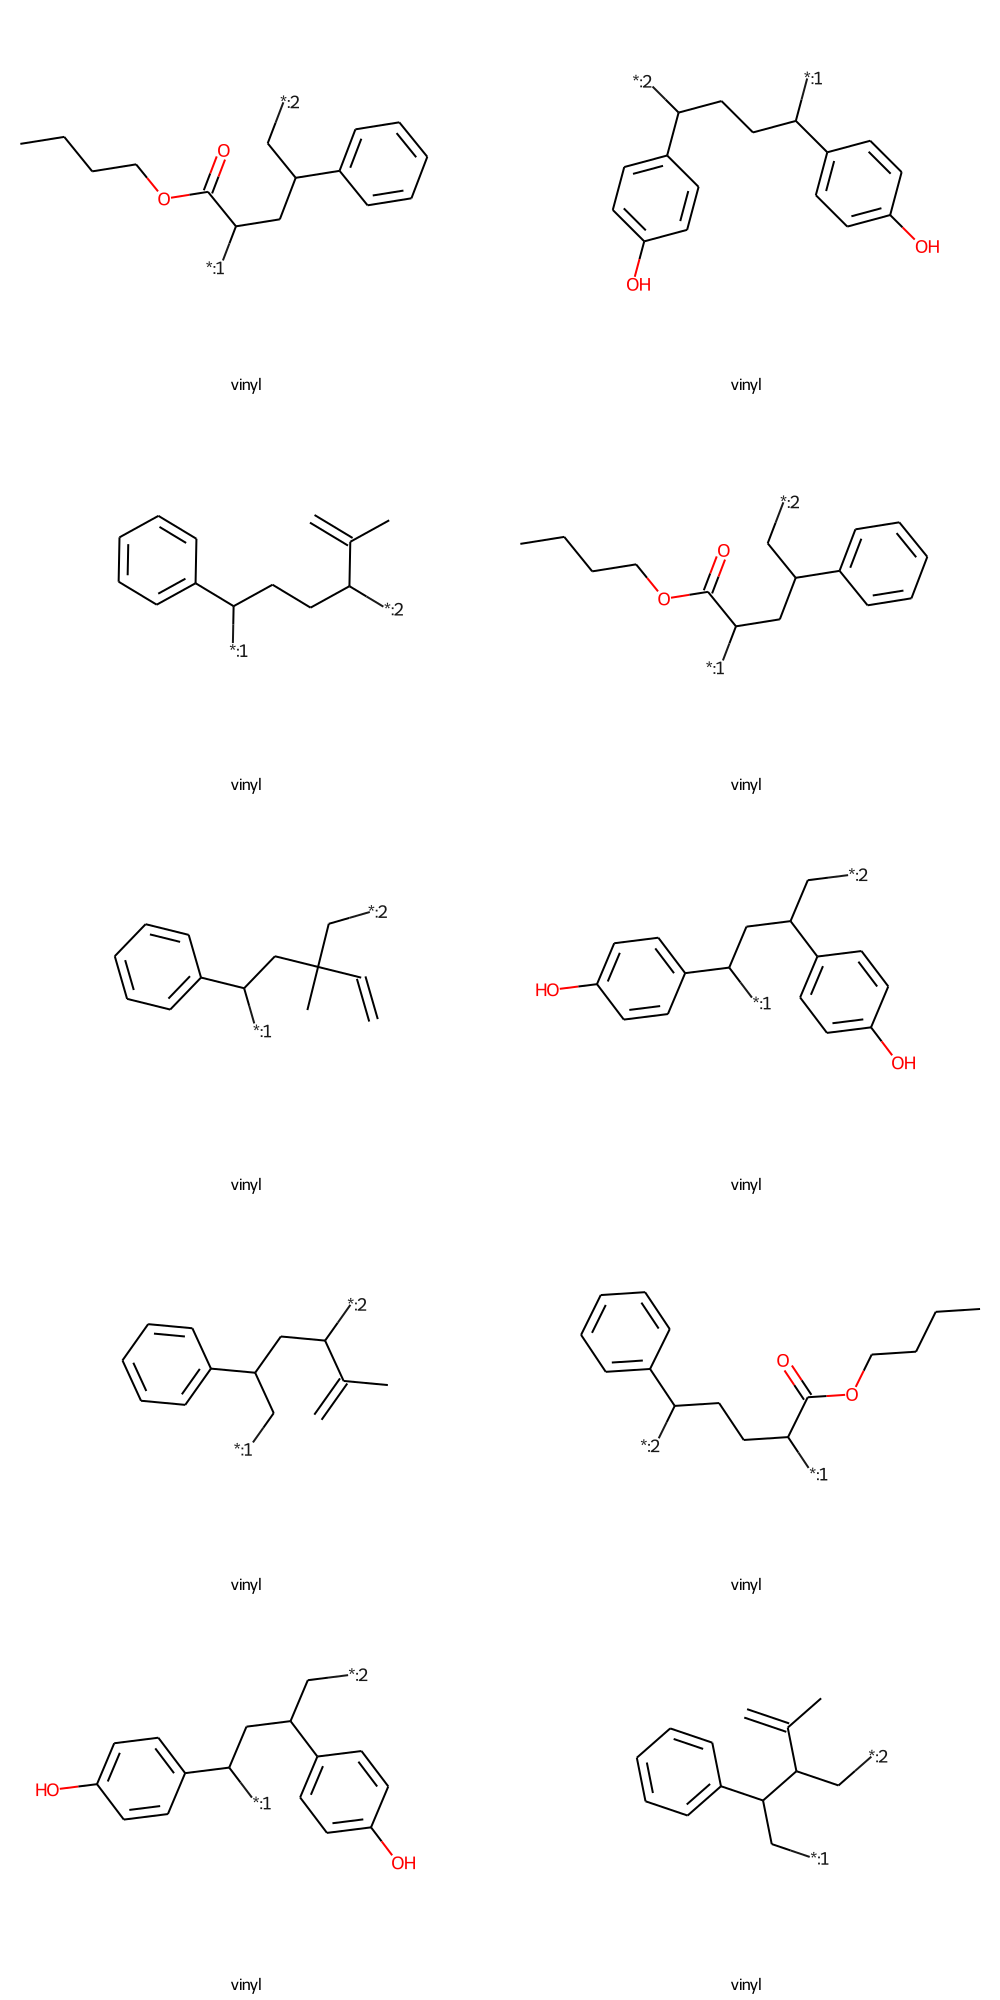

In [11]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in df_headtail["smiles_polymer_head_tail"]], molsPerRow=2, legends= [row for row in df_headtail['mechanism']], subImgSize=(500, 400), maxMols=10) 